In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt

%matplotlib inline

In [7]:
end_date = '2024-08-14T12:00:00.000-05:00'

In [8]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT=2022-01-01T11:24:30.377-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

,series,item_id
datetime,,
2022-01-01 12:30,8.3,pompton_gage
2022-01-01 12:45,8.3,pompton_gage
2022-01-01 13:00,8.3,pompton_gage
2022-01-01 13:15,8.3,pompton_gage
2022-01-01 13:30,8.3,pompton_gage


In [9]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT=2022-01-01T11:35:34.719-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2022-01-01 12:45,2.45,riverdale_gage
2022-01-01 13:00,2.45,riverdale_gage
2022-01-01 13:15,2.45,riverdale_gage
2022-01-01 13:30,2.45,riverdale_gage
2022-01-01 13:45,2.45,riverdale_gage


In [10]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

/var/folders/39/8gc7tmt964lf1zccbqy781gm0000gp/T/ipykernel_79460/4189062329.py:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)


,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2022-01-01 12:40,EST,7.39,A
2,USGS,01388000,2022-01-01 12:45,EST,7.38,A
3,USGS,01388000,2022-01-01 12:50,EST,7.38,A
4,USGS,01388000,2022-01-01 12:55,EST,7.39,A
5,USGS,01388000,2022-01-01 13:00,EST,7.39,A
...,...,...,...,...,...,...
274739,USGS,1388000,2024-08-14 12:40,EDT,7.65,P
274740,USGS,1388000,2024-08-14 12:45,EDT,7.64,P
274741,USGS,1388000,2024-08-14 12:50,EDT,7.64,P
274742,USGS,1388000,2024-08-14 12:55,EDT,7.65,P


In [11]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2022-01-01 12:40,7.39,ramapo_gage
2022-01-01 12:45,7.38,ramapo_gage
2022-01-01 12:50,7.38,ramapo_gage
2022-01-01 12:55,7.39,ramapo_gage
2022-01-01 13:00,7.39,ramapo_gage


In [12]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT=2022-01-01T11:39:50.674-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-04-16 00:00,0.0,pompton_precip
2024-04-16 00:15,0.0,pompton_precip
2024-04-16 00:30,0.0,pompton_precip
2024-04-16 00:45,0.0,pompton_precip
2024-04-16 01:00,0.0,pompton_precip


In [13]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT=2022-01-01T11:40:45.545-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-04-16 00:00,0.0,ramapo_precip
2024-04-16 00:15,0.0,ramapo_precip
2024-04-16 00:30,0.0,ramapo_precip
2024-04-16 00:45,0.0,ramapo_precip
2024-04-16 01:00,0.0,ramapo_precip


In [14]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [15]:
merge

,series,item_id
datetime,,
2022-01-01 12:30,8.3,pompton_gage
2022-01-01 12:45,8.3,pompton_gage
2022-01-01 13:00,8.3,pompton_gage
2022-01-01 13:15,8.3,pompton_gage
2022-01-01 13:30,8.3,pompton_gage
...,...,...
2024-08-14 12:00,0.0,ramapo_precip
2024-08-14 12:15,0.0,ramapo_precip
2024-08-14 12:30,0.0,ramapo_precip


In [16]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2022-01-01 12:30,8.3,pompton_gage
1,2022-01-01 12:45,8.3,pompton_gage
2,2022-01-01 13:00,8.3,pompton_gage
3,2022-01-01 13:15,8.3,pompton_gage
4,2022-01-01 13:30,8.3,pompton_gage
...,...,...,...
481375,2024-08-14 12:00,0.0,ramapo_precip
481376,2024-08-14 12:15,0.0,ramapo_precip
481377,2024-08-14 12:30,0.0,ramapo_precip
481378,2024-08-14 12:45,0.0,ramapo_precip


In [17]:
train_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()

series
item_id      timestamp                  
pompton_gage 2022-01-01 12:30:00     8.3
             2022-01-01 12:45:00     8.3
             2022-01-01 13:00:00     8.3
             2022-01-01 13:15:00     8.3
             2022-01-01 13:30:00     8.3

In [18]:
train_data = train_data.convert_frequency(freq='h', agg_numeric="max")

In [20]:
predictor = TimeSeriesPredictor(
    prediction_length=12,
    path="model/pompton_gage_autogluon",
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="fast_training",
    num_val_windows = 8,#
    time_limit=200,
)

Beginning AutoGluon training... Time limit = 200s
AutoGluon will save models to 'model/pompton_gage_autogluon'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.11
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:12:58 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6000
CPU Count:          10
GPU Count:          0
Memory Avail:       1.06 GB / 16.00 GB (6.7%)
Disk Space Avail:   12.87 GB / 926.35 GB (1.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'series',
 'time_limit': 200,
 'verbosity': 2}

Inferred time series frequency: 'H'
train_data c

In [21]:
predictions = predictor.predict(train_data)


predictions

data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-08-14 14:00:00  8.775553  8.671041  8.706918  8.732788   
               2024-08-14 15:00:00  8.775550  8.627748  8.678485  8.715071   
               2024-08-14 16:00:00  8.775982  8.594962  8.657103  8.701910   
               2024-08-14 17:00:00  8.776462  8.567438  8.639192  8.690931   
               2024-08-14 18:00:00  8.776618  8.542922  8.623145  8.680991   
               2024-08-14 19:00:00  8.774204  8.518203  8.606083  8.669450   
               2024-08-14 20:00:00  8.775093  8.498580  8.593501  8.661946   
               2024-08-14 21:00:00  8.774571  8.478967  8.580442  8.653612   
               2024-08-14 22:00:00  8.773372  8.459837  8.567467  8.645076   
               2024-08-14 23:00:00  8.773517  8.443021  8.556473  8.638280   
               2024-08-15 00:00:00  8.773169  8.426542  8.545532  8.631332   
               2024-08-15 01:00:00  8.772362  8.410322  8.534603  8.624218   
riverdale_gage 2024-08-14 14:00:00  2.185858  2.070468  2.110079  2.138641   
               2024-08-14 15:00:00  2.187191  2.024005  2.080024  2.120417   
               2024-08-14 16:00:00  2.187191  1.987330  2.055938  2.105410   
               2024-08-14 17:00:00  2.185858  1.955078  2.034300  2.091425   
               2024-08-14 18:00:00  2.185858  1.927838  2.016411  2.080278   
               2024-08-14 19:00:00  2.185858  1.903211  2.000238  2.070201   
               2024-08-14 20:00:00  2.184525  1.879231  1.984032  2.059601   
               2024-08-14 21:00:00  2.184525  1.858152  1.970189  2.050976   
               2024-08-14 22:00:00  2.184525  1.838355  1.957188  2.042875   
               2024-08-14 23:00:00  2.184525  1.819629  1.944890  2.035212   
               2024-08-15 00:00:00  2.183191  1.800486  1.931861  2.026591   
               2024-08-15 01:00:00  2.183191  1.783469  1.920685  2.019628   
ramapo_gage    2024-08-14 14:00:00  7.605144  7.463767  7.512299  7.547294   
               2024-08-14 15:00:00  7.604485  7.404547  7.473182  7.522672   
               2024-08-14 16:00:00  7.605211  7.360337  7.444397  7.505010   
               2024-08-14 17:00:00  7.604365  7.321610  7.418674  7.488664   
               2024-08-14 18:00:00  7.604287  7.288157  7.396678  7.474929   
               2024-08-14 19:00:00  7.603877  7.257575  7.376453  7.462173   
               2024-08-14 20:00:00  7.604418  7.230368  7.358771  7.451359   
               2024-08-14 21:00:00  7.603808  7.203932  7.341201  7.440182   
               2024-08-14 22:00:00  7.603014  7.178881  7.324477  7.429462   
               2024-08-14 23:00:00  7.603282  7.156207  7.309679  7.420343   
               2024-08-15 00:00:00  7.602781  7.133885  7.294848  7.410913   
               2024-08-15 01:00:00  7.601589  7.111844  7.279963  7.401189   
pompton_precip 2024-08-14 14:00:00  0.001214 -0.029314 -0.018834 -0.011278   
               2024-08-14 15:00:00  0.001201 -0.041971 -0.027151 -0.016465   
               2024-08-14 16:00:00  0.001217 -0.051658 -0.033507 -0.020419   
               2024-08-14 17:00:00  0.001217 -0.059838 -0.038879 -0.023766   
               2024-08-14 18:00:00  0.001466 -0.066796 -0.043363 -0.026466   
               2024-08-14 19:00:00  0.001466 -0.073311 -0.047642 -0.029132   
               2024-08-14 20:00:00  0.001036 -0.079733 -0.052007 -0.032014   
               2024-08-14 21:00:00  0.001036 -0.085309 -0.055669 -0.034296   
               2024-08-14 22:00:00  0.001036 -0.090547 -0.059109 -0.036439   
               2024-08-14 23:00:00  0.001036 -0.095501 -0.062362 -0.038466   
               2024-08-15 00:00:00  0.001048 -0.100200 -0.065444 -0.040382   
               2024-08-15 01:00:00  0.001048 -0.104703 -0.068400 -0.042224   
ramapo_precip  2024-08-14 14:00:00  0.001272 -0.038556 -0.024884 -0.015026   
               2024-08-14 15:00:00  0.001272 -0.055053 -0.0357

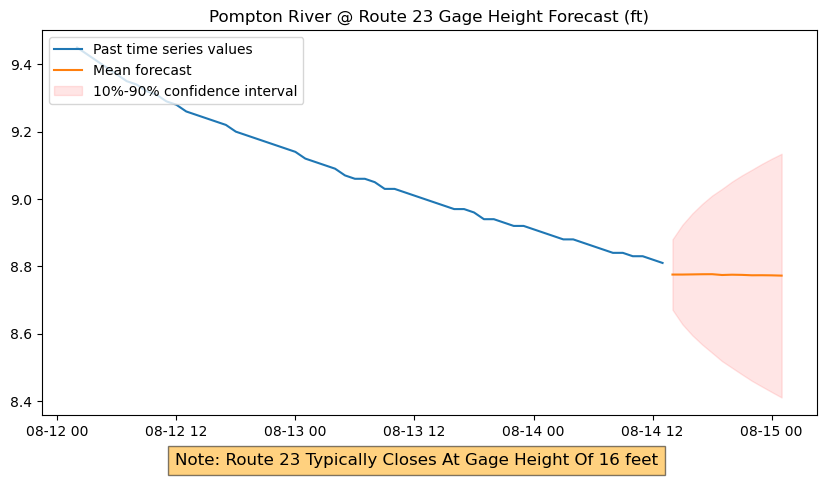

In [22]:
test_data = predictions

item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Gage Height Forecast (ft)')


y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
#y_test = test_data.loc[item_id]["5 Day Volatility"][-48:]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 16 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.legend(loc = 'upper left');
plt.savefig('static/forecast.png')